### Computational Guided Inquiry for PChem (Neshyba & Guasco, 2023)

# Probability Densities

## A mathematical formulation of probability densities
A probability density function describes the relative likelihood of a continuous random variable having a given value. For example, The *Boltzmann probability density* of the velocity of a particle can be written as

$$
f_B(v_x) = N_Be^{-{ ( {\frac{M}{2RT}}} ) {v_x^2}} \ \ \ \   (1)  
$$

where we have written it as a function of the *x-direction velocity component*, $v_x$ (the y- and z-forms look very similar). You can see that this function also depends on the temperature (*T*) and the molar mass of the molecule (*M*); we say $f_B$ is *parameterized* by these quantitites. The quantity $N_B$ in Eq. 1 is called a *normalization constant*, which also depends on these parameters,

$$
N_B = {\big( {\frac{M}{2 \pi RT}} \big)}^{1/2}  \ \ \ \ (2)
$$

Similarly, the *Maxwell probability density* is written

$$
f_M(v) = N_Mv^2e^{-{( \frac{M}{2RT}} ) {v^2}} \ \ \ \ (3)
$$

where (unlike $f_B$) we have written it as a function of the *molecular speed*, $v$. The normalization constant for the Maxwell probability density is given by

$$
N_M = 4 \pi \big( {{\frac{M}{2 \pi RT}} \big)}^{3/2} \ \ \ \ (4) 
$$

## Visualizing probability densities as thermodynamic surfaces
For a given molar mass, we can think of these functions as surfaces in two dimensions, (1) the velocity component or speed and (2) the temperature. A shorthand for these surfaces would be $f_B(T,v_x)$ or $f_M(T,v)$. What do such surfaces look like? One is shown in the figure below. Such figures are useful for developing an intuition about how molecules move; for example, it is evident from the figure that molecules exhibit a broader distribution of velocities at higher temperature.

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/fbsurface.png" height="600" width="600"/>

__Figure 1__. The Boltzmann probability density as a function of velocity and temperature.
</p>

## Units
It may not be obvious from mathematical formulas above, but the fact is that the dimensions of $f_B$ have to be the *inverse* of $v_x$. Since we're using the SI unit system here, specifying $v_x$ in $m/s$ means $f_B$ has to have units $s/m$. Same for $v$ and $f_M$.

## Learning Goals
1. I can explain the difference between a velocity component ($v_x$, $v_y$, or $v_z$) and a speed ($v$), including the physically possible ranges of each.
1. I can describe which probability density ($f_B$ or $f_M$) is appropriate for velocity component, and which is for speed.
1. I can use Python to visualize $f_B(T,v_x)$ and $f_M(T,v)$ as two-dimensional surfaces; even if the x- and y-axes were not labeled, I could identify them from the shape of those surfaces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import sys; sys.path.append('/home'); import PchemLibrary as PL

In [2]:
%matplotlib notebook

### Assign the following values using AssignQuantity
    
    n should be 1 mole
    R should be 8.314 J/(mol K)
    M should be 0.028 kg/mol (The molar mass N2, in SI units)

In [3]:
# n
### BEGIN SOLUTION
n = AssignQuantity(1,"mol")
print(n)
### END SOLUTION

# R
### BEGIN SOLUTION
R = AssignQuantity(8.314, "J/(mol K)")
print(R)
### END SOLUTION

# Mass of a mole of N2
### BEGIN SOLUTION
M = AssignQuantity(28,'g/mol')
M.ito_base_units()
print(M)
### END SOLUTION

1 mole
8.314 joule / kelvin / mole
0.028 kilogram / mole


### Calculating $f_B(T, v_x)$

To calculate the Boltzmann probability density, we have to specify some parameters; the units are all SI.

In [4]:
# Temperature
T = AssignQuantity(298, "K")
print(T)

# Velocity component in the x-direction
vx = AssignQuantity(500,"m/s")
print(vx)

# Here's the normalization constant
NB = np.sqrt(M/(2*np.pi*R*T))
print(NB)

# Now the Boltzmann function, converted to s/m
D = M/(2*R*T)
fB = NB * np.exp(-D*vx**2)
fB.ito("s/m")
print(fB)

298 kelvin
500 meter / second
0.0013411456316653346 kilogram ** 0.5 / joule ** 0.5
0.0003265575188853832 second / meter


### Your turn
OK, do the same for $f_M(T,v)$. Differences will be: 

- Instead of a velocity component, we need a speed ("v") of $500 \ {m\over s}$. Do this using AssignQuantity.
- There's a different normalization constant (see the introduction).
- As with fB, convert fM to seconds/meter.

In [5]:
# Temperature
### BEGIN SOLUTION
T = AssignQuantity(298, "K")
print(T)
### END SOLUTION

# Speed in the x-direction
### BEGIN SOLUTION
v = AssignQuantity(500,"m/s")
print(v)
### END SOLUTION

# NM
### BEGIN SOLUTION
NM = 2**.5*M**(3/2)*R**(-3/2)*T**(-3/2)*np.pi**(-0.5)
### END SOLUTION

# fM in s/m
### BEGIN SOLUTION
D = M/(2*R*T)
fM= NM*v**2*np.exp(-D*v**2)
fM.ito("s/m")
print(fM)
### END SOLUTION

298 kelvin
500 meter / second
0.0018452764498449957 second / meter


### Visualizing $f_B(T,v_x)$
Our next objective is to get Python to display the probability density function $f_B(T,v_x)$. We've tried to keep the variable names as simple as possible, but just just to be clear, the variables TB, vx, D, NB, and fB created in this cell are all *grids*.

shape of fB: (40, 60)
units of fB: second / meter


<IPython.core.display.Javascript object>


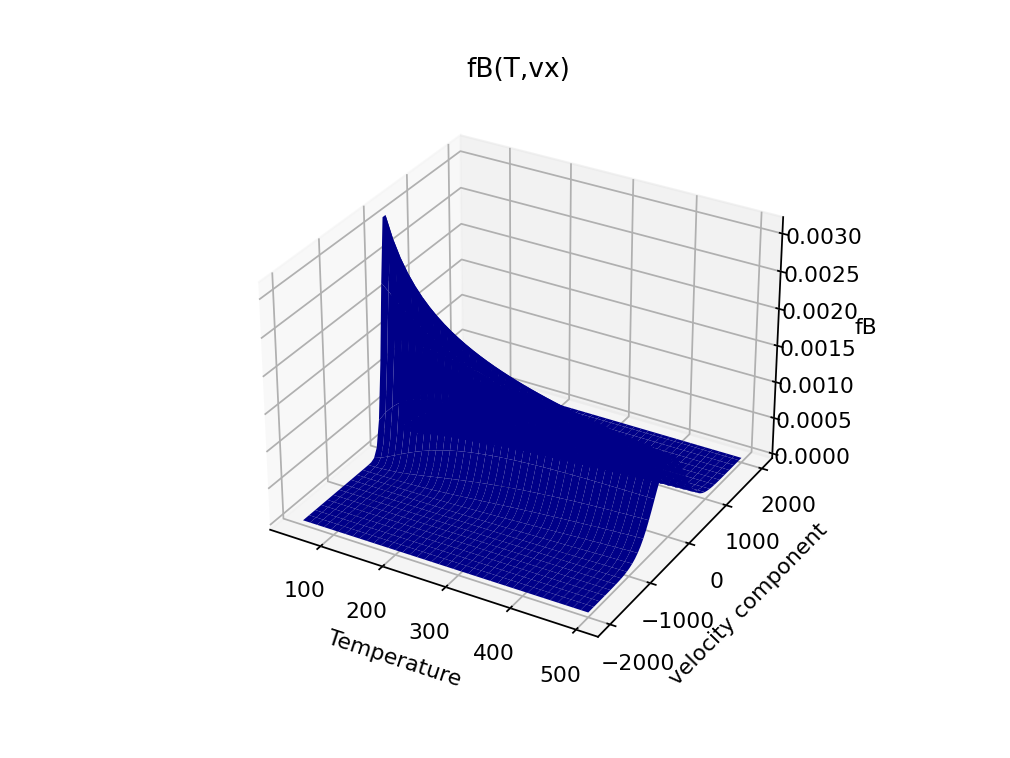

<Axes3DSubplot:title={'center':'fB(T,vx)'}, xlabel='Temperature', ylabel='velocity component'>

In [12]:
# Make the grids, with units
TB,vx = PL.Statespace([50,500,40],[-2000,2000,60])
TB = AssignQuantity(TB,"K")
vx = AssignQuantity(vx,"m/s")

# Calculate the normalization constant as a grid
NB = np.sqrt(M/(2*np.pi*R*TB))

# Calculate fB for this state space
D = M/(2*R*TB)
fB = NB * np.exp(-D*vx**2)
fB.ito(1/vx.units)
print("shape of fB:",np.shape(fB))
print("units of fB:",fB.units)

# Prep the axis labels
llist = ["Temperature","velocity component","fB"]

# Graph the fB surface
PL.plot_surface1(TB, vx, fB, color='blue', title='fB(T,vx)',labellist=llist) # Make the mesh plot

### Pause for analysis
Take a moment to digest your results here. For example, if somebody had shown you this graph, but forgotten to label the x- and y-axes, would you be able to figure out which was the temperature axis, and which was $v_x$?

### Your turn
Now do something similar, but for $f_M(T,v)$. There will be some changes you'll need to pay attention to. For one, speeds are non-negative (you can't ride a bicycle at "-10 mph"). Because of this, your state space should specify speeds from 0 to 2000 m/s, something along the lines of the command

    TM,v = PL.Statespace([50,500,40],[0,2000,70])

with subsequent attachment of units, as usual. Another point to notice is that this command creates new state-space grids, with shapes (40, 70). Since DM, NM, and fM are all created using these grids, they would also have shapes of (40, 70).

shape of fM: (40, 70)
units of fM: second / meter


<IPython.core.display.Javascript object>


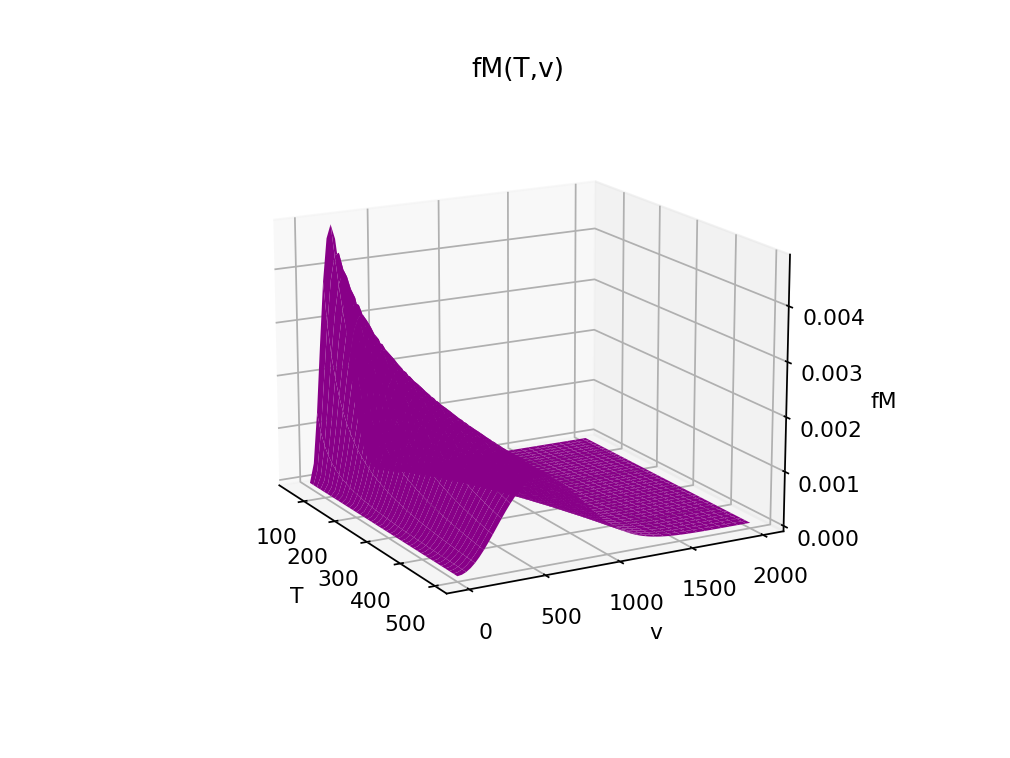

In [11]:
# Make T and v as grids using PL.Statespace, with units
### BEGIN SOLUTION
TM,v = PL.Statespace([50,500,40],[0,2000,70])
TM = AssignQuantity(TM,"K")
v = AssignQuantity(v,"m/s")
### END SOLUTION

# Calculate the normalization constant
### BEGIN SOLUTION
NM = 4*np.pi*(M/(2*np.pi*R*TM))**(3/2)
### END SOLUTION

# Calculate fM for this state space
### BEGIN SOLUTION
DM = M/(2*R*TM)
fM= NM*v**2*np.exp(-DM*v**2)
fM.ito(1/v.units)
print("shape of fM:",np.shape(fM))
print("units of fM:",fM.units)
### END SOLUTION

# Prep the axis labels
llist = ["T","v","fM"]

# Graph the fM surface
### BEGIN SOLUTION
PL.plot_surface1(TM, v, fM, color='magenta',title='fM(T,v)',labellist=llist) # Make the mesh plot

Saving = True
if Saving:
    prefix = '../Week_03b.NumericalMoments/'
    np.savetxt(prefix+'TM.txt',TM.magnitude,header='Tgrid for fM, units '+str(TM.units))
    np.savetxt(prefix+'TB.txt',TB.magnitude,header='Tgrid for fB, units '+str(TB.units))
    np.savetxt(prefix+'vx.txt',vx.magnitude,header='vx for fB, units '+str(vx.units))
    np.savetxt(prefix+'v.txt',v.magnitude,header='v for fM, units '+str(v.units))
    np.savetxt(prefix+'fB.txt',fB.magnitude,header='fB, units '+str(fB.units))
    np.savetxt(prefix+'fM.txt',fM.magnitude,header='fM, units '+str(fM.units))
### END SOLUTION

### Pause for analysis
Similarly to before, take a moment to digest this image. What strikes you as being particularly different relative to $f_B(T,v_x)$? Would you know how to identify which was which if somebody showed you both surfaces?

### Refresh/save/validate
To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page